# 12 - Advanced Level Example - Modeling an Agriculture+PV (AGRIPV) Site 

This journal shows how to model an AgriPV site, calculating the irradiance not only on the modules but also the irradiance received by the ground to evaluate available solar ersource for plants. 

We assume that bifacia_radiacne is already installed in your computer. This works for bifacial_radiance v.3 release.

These journal outlines 4 useful uses of bifacial_radiance and some tricks: 

<ul>
    <li> Creating the modules in the AgriPV site </li>
    <li> Adding extra geometry for the pillars/posts supporting the AgriPV site </li>
    <li> Hacking the sensors to sample the ground irradiance and create irradiance map </li>
    <li> Adding object to simulate variations in ground albedo from different crops between rows. </li>
</ul>


#### Steps:

<ol>
    <li> <a href='#step1'> Generate the geometry </a></li>
    <li> <a href='#step2'> Analyse the Ground Irradiance </a></li>
    <li> <a href='#step3'> Analyse and MAP the Ground Irradiance </a></li>
    <li> <a href='#step4'> Adding different Albedo Section </a></li>
</ol>
    
#### Preview of what we will create: 
    
![Another view](../images_wiki/AdvancedJournals/AgriPV_2.PNG)
![AgriPV Image We will create](../images_wiki/AdvancedJournals/AgriPV_1.PNG)
And this is how it will look like:

![AgriPV modeled step 4](../images_wiki/AdvancedJournals/AgriPV_step4.PNG)




<a id='step1'></a>

## 1. Generate the geometry 

This section goes from setting up variables to making the OCT axis. We are also adding some custom elements for the torquetubes and posts.

We've done this before a couple times, no new stuff here. 

The magic is that, for doing the carport we see in the figure, we are going to do a 4-up configuration of modules (**numpanels**), and we are going to repeat that 3-UP 6 times (**nMods**)

In [5]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'AgriPVDemo')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\bifacial_radiance\TEMP')  

try:
    os.stat(testfolder)
except:
    os.mkdir(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPVDemo


In [6]:
from bifacial_radiance import *   
import numpy as np

In [9]:
timestamp = 4020 # Noon, June 17th. 
simulationname = 'AgriPV'

#Location:
lat = 40.0583  # NJ
lon = -74.4057  # NJ
# MakeModule Parameters
moduletype='PrismSolar'
numpanels = 3  # AgriPV site has 3 modules along the y direction (N-S since we are facing it to the south) .
x = 0.95  
y = 1.95
xgap = 2.0# Leaving 15 centimeters between modules on x direction
ygap = 0.10 # Leaving 10 centimeters between modules on y direction
zgap = 0 # no gap to torquetube.
sensorsy = 6*numpanels  # this will give 6 sensors per module, 1 per cell

# Other default values:

# TorqueTube Parameters
axisofrotationTorqueTube=False
torqueTube = False
cellLevelModule = True

numcellsx = 12
numcellsy = 6
xcell = 0.156
ycell = 0.156
xcellgap = 0.02
ycellgap = 0.02

cellLevelModuleParams = {'numcellsx': numcellsx, 'numcellsy':numcellsy, 
                         'xcell': xcell, 'ycell': ycell, 'xcellgap': xcellgap, 'ycellgap': ycellgap}

# SceneDict Parameters
pitch = 15 # m
albedo = 0.2  #'grass'     # ground albedo
hub_height = 4.3 # m  
nMods = 6 # six modules per row.
nRows = 3  # 3 row

azimuth_ang=180 # Facing south
tilt =35 # tilt. 

# Now let's run the example

demo = RadianceObj(simulationname,path = testfolder)  # Create a RadianceObj 'object'
demo.setGround(albedo) # input albedo number or material name like 'concrete'.  To see options, run this without any input.
epwfile = demo.getEPW(lat, lon) # NJ lat/lon 40.0583° N, 74.4057
metdata = demo.readEPW(epwfile) # read in the EPW weather data from above
demo.gendaylit(4020)  # Use this to simulate only one hour at a time. 
# This allows you to "view" the scene on RVU (see instructions below)
# timestam 4020 : Noon, June 17th.
#demo.genCumSky(demo.epwfile) # Use this instead of gendaylit to simulate the whole year

# Making module with all the variables
moduleDict=demo.makeModule(name=moduletype,x=x,y=y,numpanels = numpanels, xgap=xgap, ygap=ygap, cellLevelModuleParams = cellLevelModuleParams)
# create a scene with all the variables
sceneDict = {'tilt':tilt,'pitch': 15,'hub_height':hub_height,'azimuth':azimuth_ang, 'module_type':moduletype, 'nMods': nMods, 'nRows': nRows}  
scene = demo.makeScene(moduletype=moduletype, sceneDict=sceneDict) #makeScene creates a .rad file with 20 modules per row, 7 rows.
octfile = demo.makeOct(demo.getfilelist())  # makeOct combines all of the ground, sky and object fil|es into a .oct file.


path = C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPVDemo
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_NJ_McGuire.AFB.724096_TMY3.epw
 ... OK!
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
01_06_17_13_00

Module Name: PrismSolar
Module was shifted by 0.078 in X to avoid sensors on air
This is a Cell-Level detailed module with Packaging Factor of 0.81 %
Module PrismSolar updated in module.json
Created AgriPV.oct


If you view the Oct file at this point:

###    rvu -vf views\front.vp -e .01 AgriPV.oct

And adjust the view parameters, you should see this image.

![AgriPV modeled step 1](../images_wiki/AdvancedJournals/AgriPV_step1.PNG)


### Adding the structure

We will add on the torquetube and pillars.

Positions of the piles could be done more programatically, but they are kinda estimated at the moment. 

In [10]:
torquetubelength = moduleDict['scenex']*(nMods) 

# torquetube 1
name='Post1'
text='! genbox Metal_Aluminum_Anodized torquetube_row1 {} 0.2 0.3 | xform -t {} -0.1 -0.3 | xform -t 0 0 4.2'.format(torquetubelength, (-torquetubelength+moduleDict['sceney'])/2.0)
#text='! genbox black cuteBox 10 0.2 0.3 | xform -t -5 -0.1 -0.15 | xform  -t 0 15 4.2'.format(z2nd, xleft, y2nd)
customObject = demo.makeCustomObject(name,text)
demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

name='Post2'
text='! genbox Metal_Aluminum_Anodized torquetube_row2 {} 0.2 0.3 | xform -t {} -0.1 -0.3 | xform -t 0 15 4.2'.format(torquetubelength, (-torquetubelength+moduleDict['sceney'])/2.0)
customObject = demo.makeCustomObject(name,text)
demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

name='Post3'
text='! genbox Metal_Aluminum_Anodized torquetube_row2 {} 0.2 0.3 | xform -t {} -0.1 -0.3 | xform -t 0 -15 4.2'.format(torquetubelength, (-torquetubelength+moduleDict['sceney'])/2.0)
customObject = demo.makeCustomObject(name,text)
demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

#octfile = demo.makeOct()  # makeOct combines all of the ground, sky and object files into a .oct file.


Custom Object Name objects\Post1.rad

Custom Object Name objects\Post2.rad

Custom Object Name objects\Post3.rad


In [11]:
name='Pile'
pile1x = (torquetubelength+moduleDict['sceney'])/2.0
pilesep = pile1x*2.0/7.0
#! genrev Metal_Grey tube1 t*1.004 0.05 32 | xform -ry 90 -t -0.502 0 0
text= '! genrev Metal_Grey tube1row1 t*4.2 0.15 32 | xform -t {} 0 0'.format(pile1x)
text += '\r\n! genrev Metal_Grey tube1row2 t*4.2 0.15 32 | xform -t {} 15 0'.format(pile1x)
text += '\r\n! genrev Metal_Grey tube1row3 t*4.2 0.15 32 | xform -t {} -15 0'.format(pile1x)

for i in range (1, 7):
    text += '\r\n! genrev Metal_Grey tube{}row1 t*4.2 0.15 32 | xform -t {} 0 0'.format(i+1, pile1x-pilesep*i)
    text += '\r\n! genrev Metal_Grey tube{}row2 t*4.2 0.15 32 | xform -t {} 15 0'.format(i+1, pile1x-pilesep*i)
    text += '\r\n! genrev Metal_Grey tube{}row3 t*4.2 0.15 32 | xform -t {} -15 0'.format(i+1, pile1x-pilesep*i)

customObject = demo.makeCustomObject(name,text)
demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

octfile = demo.makeOct()  # makeOct combines all of the ground, sky and object files into a .oct file.


Custom Object Name objects\Pile.rad
Created AgriPV.oct


### View the geometry with the posts on :

#### rvu -vf views\front.vp -e .01 -pe 0.4 -vp 12 -10 3.5 -vd -0.0995 0.9950 0.0 AgriPV.oct

![AgriPV modeled step 2](../images_wiki/AdvancedJournals/AgriPV_step2.PNG)


<a id='step3'></a>


<a id='step3'></a>

<a id='step4'></a>

<a id='step2'></a>

## 2. Analyse  the Ground Irradiance

Now let's do some analysis along the ground, starting from the edge of the modules. We wil select to start in the center of the array.

We are also increasign the number of points sampled accross the collector width, with the  variable **sensorsy** passed to **moduleanalysis**. We are also increasing the step between sampling points, to be able to sample in between the rows.

In [8]:
analysis = AnalysisObj(octfile, demo.name)  # return an analysis object including the scan dimensions for back irradiance
sensorsy = 20
frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)


In [10]:
groundscan = frontscan

In [13]:
groundscan['zstart'] = 0.05  # setting it 5 cm from the ground.
groundscan['zinc'] = 0   # no tilt necessary. 
groundscan['yinc'] = pitch/(sensorsy-1)   # increasing spacing so it covers all distance between rows
groundscan

{'xstart': 1.5159739062663865e-16,
 'ystart': -1.237886635821746,
 'zstart': 0.05,
 'xinc': -1.5802346387185998e-17,
 'yinc': 0.7894736842105263,
 'zinc': 0,
 'Nx': 1,
 'Ny': 20.0,
 'Nz': 1,
 'orient': '-0.000 0.574 -0.819'}

In [14]:
analysis.analysis(octfile, simulationname+"_groundscan", groundscan, backscan)  # compare the back vs front irradiance  


Linescan in process: AgriPV_groundscan_Front
Linescan in process: AgriPV_groundscan_Back
Saved: results\irr_AgriPV_groundscan.csv
Annual bifacial ratio average:  0.230



This is the result for only one 'chord' accross the ground. Let's now do a X-Y scan of the ground.

<a id='step3'></a>

## 3. Analyse and MAP the Ground Irradiance

 We will use the same technique to find the irradiance on the ground used above, but will move it along the X-axis to map from the start of one module to the next.
 
 We will sample around the module that is placed at the center of the field.

![AgriPV modeled step 4](../images_wiki/AdvancedJournals/spacing_between_modules.PNG)

In [55]:
import pandas as pd
import seaborn as sns

In [16]:
sensorsx = 20
startgroundsample=-moduleDict['scenex']
spacingbetweensamples = moduleDict['scenex']/(sensorsx-1)

for i in range (0, sensorsx): # Will map 20 points    
    frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)
    groundscan = frontscan
    groundscan['zstart'] = 0.05  # setting it 5 cm from the ground.
    groundscan['zinc'] = 0   # no tilt necessary. 
    groundscan['yinc'] = pitch/(sensorsy-1)   # increasing spacing so it covers all distance between rows
    groundscan['xstart'] = startgroundsample + i*spacingbetweensamples   # increasing spacing so it covers all distance between rows
    analysis.analysis(octfile, simulationname+"_groundscan_"+str(i), groundscan, backscan)  # compare the back vs front irradiance  


Linescan in process: AgriPV_groundscan_0_Front
Linescan in process: AgriPV_groundscan_0_Back
Saved: results\irr_AgriPV_groundscan_0.csv
Linescan in process: AgriPV_groundscan_1_Front
Linescan in process: AgriPV_groundscan_1_Back
Saved: results\irr_AgriPV_groundscan_1.csv
Linescan in process: AgriPV_groundscan_2_Front
Linescan in process: AgriPV_groundscan_2_Back
Saved: results\irr_AgriPV_groundscan_2.csv
Linescan in process: AgriPV_groundscan_3_Front
Linescan in process: AgriPV_groundscan_3_Back
Saved: results\irr_AgriPV_groundscan_3.csv
Linescan in process: AgriPV_groundscan_4_Front
Linescan in process: AgriPV_groundscan_4_Back
Saved: results\irr_AgriPV_groundscan_4.csv
Linescan in process: AgriPV_groundscan_5_Front
Linescan in process: AgriPV_groundscan_5_Back
Saved: results\irr_AgriPV_groundscan_5.csv
Linescan in process: AgriPV_groundscan_6_Front
Linescan in process: AgriPV_groundscan_6_Back
Saved: results\irr_AgriPV_groundscan_6.csv
Linescan in process: AgriPV_groundscan_7_Front
L

Read all the files generated into one dataframe

In [30]:
filestarter = "irr_AgriPV_groundscan_"

filelist = sorted(os.listdir(os.path.join(testfolder, 'results')))
prefixed = [filename for filename in filelist if filename.startswith(filestarter)]
arrayWm2Front = []
arrayWm2Back = []
arrayMatFront = []
arrayMatBack = []
filenamed = []
faillist = []

print('{} files in the directory'.format(filelist.__len__()))
print('{} groundscan files in the directory'.format(prefixed.__len__()))
i = 0  # counter to track # files loaded.

for i in range (0, len(prefixed)):
    ind = prefixed[i].split('_')
    #print(" Working on ", filelist[i], locs[ii], Scenario[jj])
    try:
        resultsDF = load.read1Result(os.path.join(testfolder, 'results', prefixed[i]))
        arrayWm2Front.append(list(resultsDF['Wm2Front']))
        arrayWm2Back.append(list(resultsDF['Wm2Back']))
        arrayMatFront.append(list(resultsDF['mattype']))
        arrayMatBack.append(list(resultsDF['rearMat']))
        filenamed.append(prefixed[i])
    except:
        print(" FAILED ", i, prefixed[i])
        faillist.append(prefixed[i])

resultsdf = pd.DataFrame(list(zip(arrayWm2Front, arrayWm2Back, 
                                  arrayMatFront, arrayMatBack)),
                         columns = ['br_Wm2Front', 'br_Wm2Back', 
                                    'br_MatFront', 'br_MatBack'])
resultsdf['filename'] = filenamed

20 files in the directory
20 groundscan files in the directory


Creating a new dataframe where  each element in the front irradiance list is a column. Also transpose and reverse so it looks like a top-down view of the ground.

In [54]:
df3 = pd.DataFrame(resultsdf['br_Wm2Front'].to_list())
reversed_df = df3.T.iloc[::-1]

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

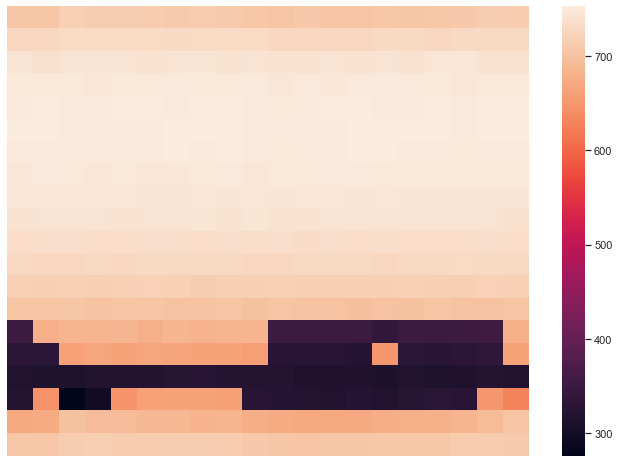

In [60]:
# Plot
ax = sns.heatmap(reversed_df)
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('')  
ax.set_xlabel('')  
#ax.tick_params(left=False, bottom=False)
print('')

<a id='step4'></a>

## 4. Adding different Albedo Sections
Add a surface (just like we added the pillars) with a specific reflectivity to represent different albedo sections. In the image, we can see that the albedo between the crops is different than the crop albedo. Let's assume that the abledo between the crops is higher than the crop's albedo which wa previuosly set a 0.2.



In [16]:
name='Center_Grass'
carpositionx=-2
carpositiony=-1
text='! genbox white_EPDM CenterPatch 28 12 0.1 | xform -t -14 2 0'.format(carpositionx, carpositiony)
customObject = demo.makeCustomObject(name,text)
demo.appendtoScene(scene.radfiles, customObject, '!xform -rz 0')

octfile = demo.makeOct(demo.getfilelist())  # makeOct combines all of the ground, sky and object files into a .oct file.



Custom Object Name objects\Center_Grass.rad
Created AgriPV.oct


Viewing with rvu:

![AgriPV modeled step 4](../images_wiki/AdvancedJournals/AgriPV_step4.PNG)

